In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

In [3]:
passenger=pd.read_csv('AirPassengers.csv',index_col=0)
passenger

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [5]:
idx=pd.to_datetime(passenger.index).to_period("M")
passenger.index=idx

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

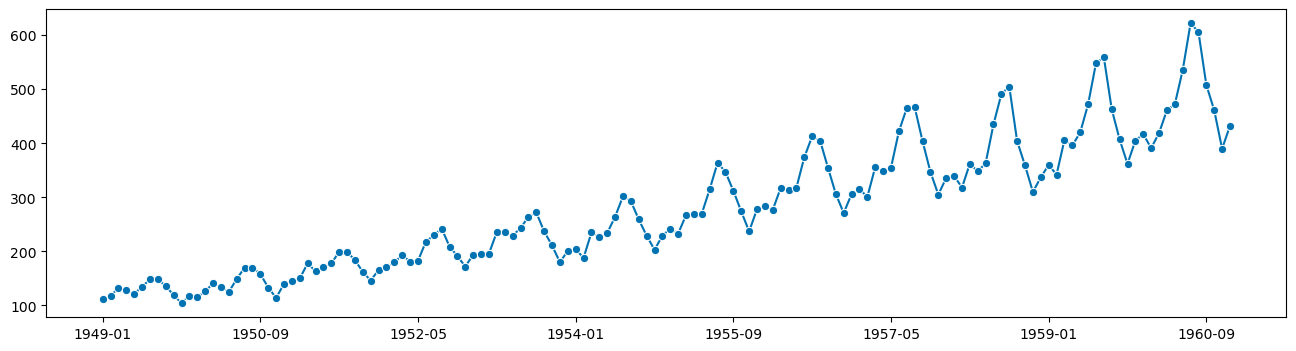

In [6]:
plot_series(passenger)

In [7]:
y=passenger['Passengers']
y_train,y_test=temporal_train_test_split(y,test_size=6)
print(y_train.shape, y_test.shape)

(138,) (6,)


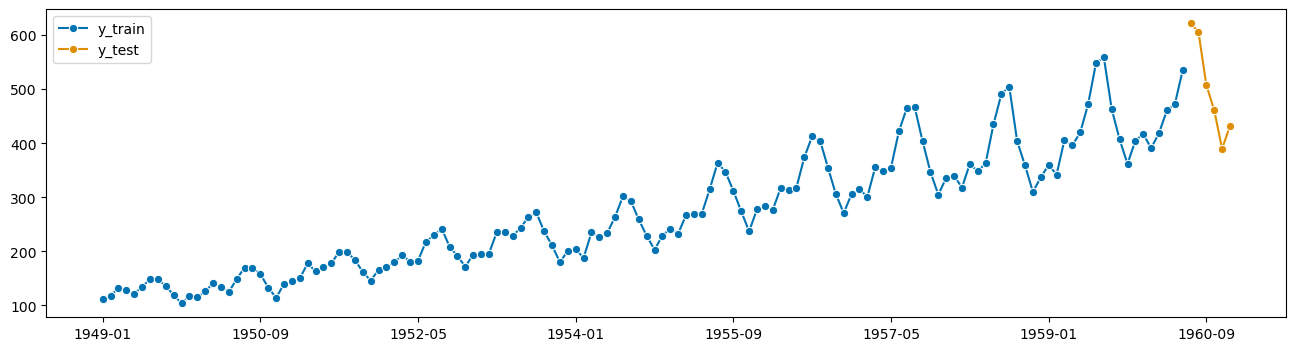

In [8]:
plot_series(y_train,y_test,labels=['y_train','y_test']);

In [9]:
fh=ForecastingHorizon(y_test.index,is_relative=False)

In [10]:
forecaster=AutoETS(auto=True,sp=12)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  138
Model:                       ETS(MAM)   Log Likelihood                -497.437
Date:                Thu, 16 Nov 2023   AIC                           1030.874
Time:                        19:06:15   BIC                           1083.564
Sample:                    01-31-1949   HQIC                          1052.286
                         - 06-30-1960   Scale                            0.001
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.7450      0.089      8.400      0.000       0.571       0.919
smoothing_trend       7.45e-05        nan        nan        nan         nan         nan
smoothing_season

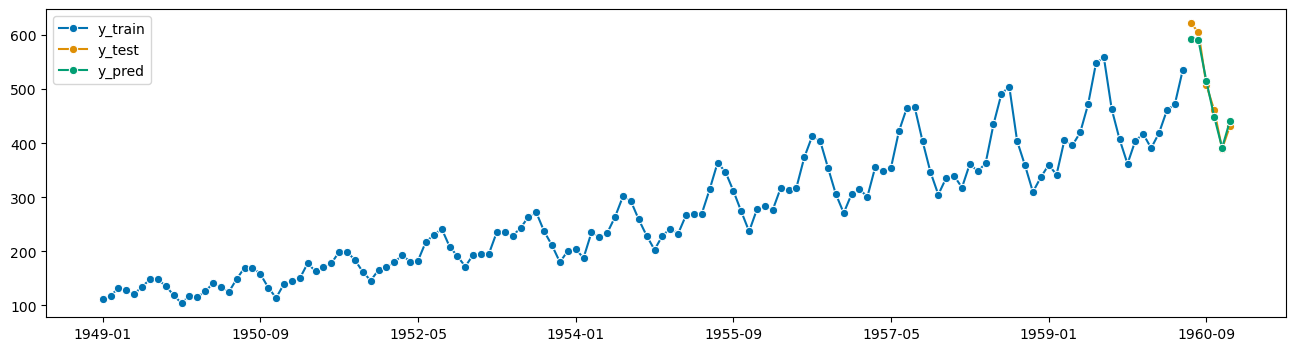

In [11]:
y_pred=forecaster.predict(fh)
plot_series(y_train,y_test,y_pred,labels=['y_train','y_test','y_pred'])
plt.show()

In [12]:
mean_squared_error(y_test,y_pred,square_root=True)

15.302783836044014